In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from sysquant.estimators.vol import robust_vol_calc
from systems.accounts.account_forecast import pandl_for_instrument_forecast
from systems.basesystem import System
from systems.tests.testdata import get_test_object_futures_with_portfolios
from systems.accounts.accounts_stage import Account
from sysdata.config.configdata import Config

from pprint import pprint

Configuring sim logging


In [2]:
(portfolio, posobject, combobject, capobject, rules, rawdata,data, config) = get_test_object_futures_with_portfolios()

In [3]:
# config = Config("private.private_config.yaml")

In [4]:
system = System([portfolio, posobject, combobject,
                capobject, rules, rawdata, Account()], data)

2023-08-07 18:29:53 DEBUG base_system {'stage': 'config'} Adding config defaults


In [5]:
system.config.instruments = ['SP500']

2023-08-07 18:29:53 DEBUG base_system Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2023-08-07 18:29:53 DEBUG base_system Following instruments are marked as 'ignore_instruments': not included: ['EXAMPLE']
2023-08-07 18:29:53 DEBUG base_system Following instruments removed entirely from sim: ['Another_thing', 'EXAMPLE', 'bad_thing']
2023-08-07 18:29:53 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'SP500'} Calculating pandl for instrument forecast for SP500 buy_and_hold
2023-08-07 18:29:53 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'SP500'} Calculating capped forecast for SP500 buy_and_hold
2023-08-07 18:29:53 DEBUG base_system {'stage': 'rules', 'instrument_code': 'SP500'} Calculating raw forecast SP500 for buy_and_hold
2023-08-07 18:29:53 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 'SP500'} Calculating daily prices for SP500
2023-08-07 18:29:53 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 

<Axes: xlabel='index'>

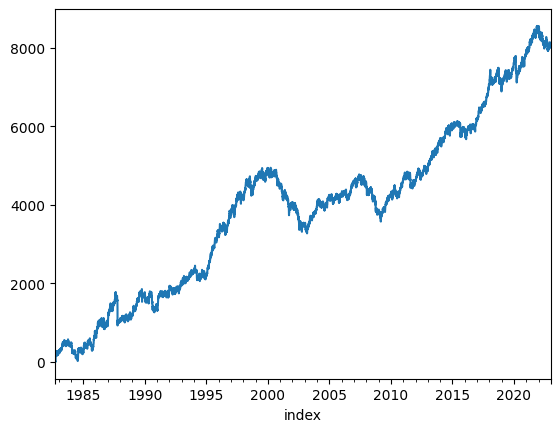

In [6]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold').ann_std()
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold').curve().plot()

In [7]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold').percent.stats()

[[('min', '-2.054'),
  ('max', '0.6666'),
  ('median', '0.004856'),
  ('mean', '0.00347'),
  ('std', '0.1135'),
  ('skew', '-1.151'),
  ('ann_mean', '0.8882'),
  ('ann_std', '1.815'),
  ('sharpe', '0.4893'),
  ('sortino', '0.6202'),
  ('avg_drawdown', '-1.517'),
  ('time_in_drawdown', '0.9425'),
  ('calmar', '0.1169'),
  ('avg_return_to_drawdown', '0.5855'),
  ('avg_loss', '-0.08038'),
  ('avg_gain', '0.0815'),
  ('gaintolossratio', '1.014'),
  ('profitfactor', '1.09'),
  ('hitrate', '0.518'),
  ('t_stat', '3.135'),
  ('p_value', '0.001721')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]

In [8]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold_with_risk_scaling').ann_std()

2023-08-07 18:29:54 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'SP500'} Calculating pandl for instrument forecast for SP500 buy_and_hold_with_risk_scaling
2023-08-07 18:29:54 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'SP500'} Calculating capped forecast for SP500 buy_and_hold_with_risk_scaling
2023-08-07 18:29:54 DEBUG base_system {'stage': 'rules', 'instrument_code': 'SP500'} Calculating raw forecast SP500 for buy_and_hold_with_risk_scaling
2023-08-07 18:29:54 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 'SP500'} Calculating daily prices for SP500


263.2256637062807

<Axes: xlabel='index'>

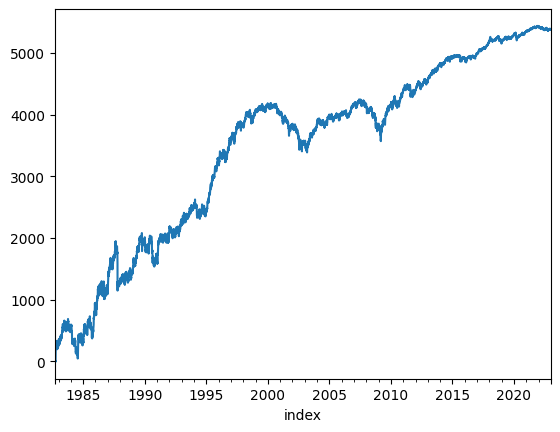

In [9]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold_with_risk_scaling').curve().plot()

In [10]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold_with_risk_scaling').percent.stats()

[[('min', '-1.975'),
  ('max', '0.6006'),
  ('median', '0.001821'),
  ('mean', '0.002325'),
  ('std', '0.07478'),
  ('skew', '-2.188'),
  ('ann_mean', '0.5953'),
  ('ann_std', '1.196'),
  ('sharpe', '0.4975'),
  ('sortino', '0.5894'),
  ('avg_drawdown', '-0.6528'),
  ('time_in_drawdown', '0.9327'),
  ('calmar', '0.1634'),
  ('avg_return_to_drawdown', '0.912'),
  ('avg_loss', '-0.04678'),
  ('avg_gain', '0.04803'),
  ('gaintolossratio', '1.027'),
  ('profitfactor', '1.103'),
  ('hitrate', '0.518'),
  ('t_stat', '3.188'),
  ('p_value', '0.001435')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]

2023-08-07 18:29:55 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'SP500'} Calculating pandl for instrument forecast for SP500 buy_and_hold_with_variable_risk_scaling
2023-08-07 18:29:55 DEBUG base_system {'stage': 'forecastScaleCap', 'instrument_code': 'SP500'} Calculating capped forecast for SP500 buy_and_hold_with_variable_risk_scaling
2023-08-07 18:29:55 DEBUG base_system {'stage': 'rules', 'instrument_code': 'SP500'} Calculating raw forecast SP500 for buy_and_hold_with_variable_risk_scaling
2023-08-07 18:29:55 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 'SP500'} Calculating daily prices for SP500


<Axes: xlabel='index'>

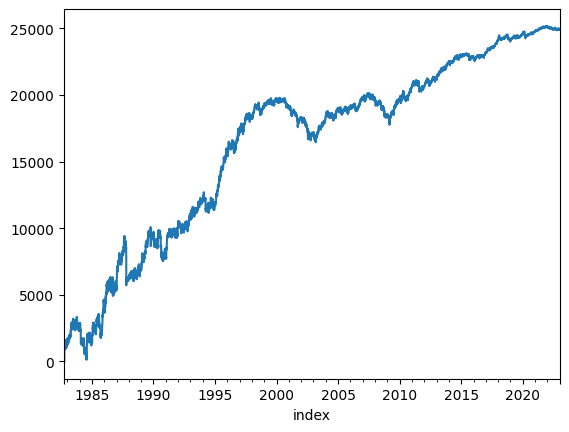

In [11]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold_with_variable_risk_scaling').curve().plot()

In [12]:
system.accounts.pandl_for_instrument_forecast("SP500", 'buy_and_hold_with_variable_risk_scaling').percent.stats()

[[('min', '-9.033'),
  ('max', '2.94'),
  ('median', '0.008072'),
  ('mean', '0.01078'),
  ('std', '0.3448'),
  ('skew', '-2.202'),
  ('ann_mean', '2.76'),
  ('ann_std', '5.517'),
  ('sharpe', '0.5003'),
  ('sortino', '0.5852'),
  ('avg_drawdown', '-2.961'),
  ('time_in_drawdown', '0.9366'),
  ('calmar', '0.1638'),
  ('avg_return_to_drawdown', '0.9321'),
  ('avg_loss', '-0.2104'),
  ('avg_gain', '0.2166'),
  ('gaintolossratio', '1.03'),
  ('profitfactor', '1.106'),
  ('hitrate', '0.518'),
  ('t_stat', '3.206'),
  ('p_value', '0.001351')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]